In [27]:
import sqlite3
import pandas as pd
import numpy as np
import scipy.stats
from pandas_profiling import ProfileReport
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt


In [28]:
#importing sql data
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    teamAttr = pd.read_sql_query("SELECT * from Team_Attributes", con)

In [29]:
#Putting the sql data into a dataframe
selected_countries = ['England','France','Germany','Italy','Spain']

countries = countries[countries.name.isin(selected_countries)]

leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))

matches = matches[matches.league_id.isin(leagues.id)]

teamAttr = teamAttr[teamAttr.team_api_id.isin(matches.home_team_api_id)]


In [30]:
#Taking a look at the dataframe created for matches and odds data

matches.head()
matchAttr = list(matches.columns)

#selecting relevant fields. 
#Subsetting for only home odds of winning from betting companies with most complete data available
#Companies with high missing % are removed. 
matches = matches[['id', 'country_id' ,'league_id', 'season','date', 'match_api_id', 'home_team_api_id', 'away_team_api_id','B365H', 'BWH','IWH','LBH','WHH','VCH']]
matches.dropna(inplace=True)

#Generating an average odds to measure against. 
#Low odds = less 'predictable', less favorable matches
#high odds = predicatabe and favorable matches
matches['avgOdds'] = matches[['BWH','IWH','LBH','WHH','VCH']].mean(axis=1)
matches

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,B365H,BWH,IWH,LBH,WHH,VCH,avgOdds
1728,1729,1729,1729,2008/2009,2008-08-17 00:00:00,489042,10260,10261,1.29,1.30,1.30,1.25,1.25,1.28,1.276
1729,1730,1729,1729,2008/2009,2008-08-16 00:00:00,489043,9825,8659,1.20,1.22,1.20,1.20,1.17,1.25,1.208
1730,1731,1729,1729,2008/2009,2008-08-16 00:00:00,489044,8472,8650,5.50,5.00,4.50,4.50,5.50,5.50,5.000
1731,1732,1729,1729,2008/2009,2008-08-16 00:00:00,489045,8654,8528,1.91,1.90,1.80,1.80,1.83,1.90,1.846
1732,1733,1729,1729,2008/2009,2008-08-17 00:00:00,489046,10252,8456,1.91,1.95,2.00,1.83,1.91,1.90,1.918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,2015-10-25 00:00:00,2030167,9906,10267,1.57,1.57,1.65,1.57,1.62,1.57,1.596
24553,24554,21518,21518,2015/2016,2015-10-24 00:00:00,2030168,9864,9783,2.25,2.35,2.20,2.25,2.38,2.30,2.296
24554,24555,21518,21518,2015/2016,2015-10-26 00:00:00,2030169,8315,9869,1.53,1.55,1.60,1.50,1.57,1.55,1.554
24555,24556,21518,21518,2015/2016,2015-10-24 00:00:00,2030170,7878,8603,2.30,2.35,2.40,2.30,2.40,2.30,2.350


In [31]:
#Taking a look at the dataframe created for team attribute data
teamAttr.head()

#splitting data frame into Categorical data and Numerical data
teamAttrCat = teamAttr[['id','team_api_id','date','buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']]
teamAttrNum = teamAttr[['id','team_api_id','buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']]


In [45]:
#Merging of the dataframes

#Renaming merging columns so all dataframe have a common merger attribute. 
matches = matches.rename(columns={'home_team_api_id':'homeTeamID'})
teamAttrCat = teamAttrCat.rename(columns={'team_api_id':'homeTeamID'})
teamAttrNum = teamAttrNum.rename(columns={'team_api_id':'homeTeamID'})

#merging
catData = matches.merge(teamAttrCat, on='homeTeamID')
numData = matches.merge(teamAttrNum, on='homeTeamID')


profile = ProfileReport(catData, title = "Defebsive Stats")
profile.to_file('numData')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Gamer Kyle\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:314: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

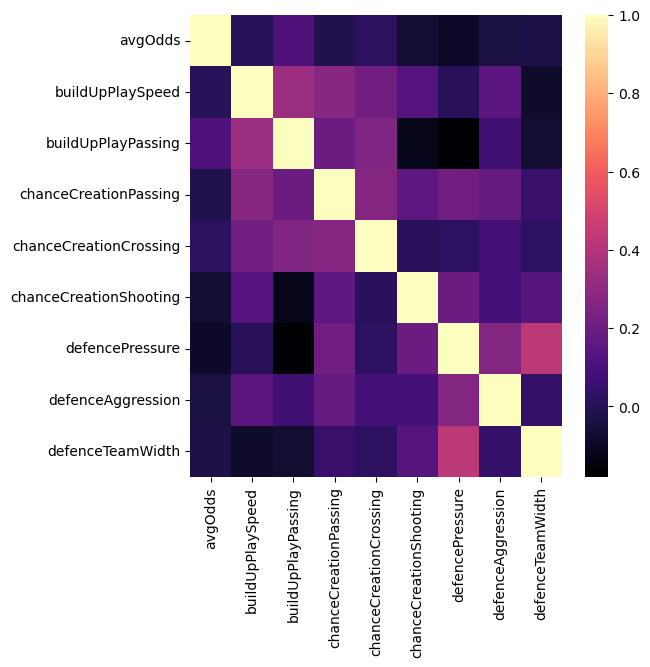

In [33]:
#Num Data

#Filter Based Selection
#finding correlation coefficents 
numData = numData[['avgOdds','buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']]
corrMatrixP = numData.corr()
corrMatrixK = numData.corr(method='kendall')
corrMatrixS = numData.corr(method='spearman')

corr_mat = numData.corr()
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sn.heatmap(corr_mat, cmap='magma');

#Wrapper Based Selection - backwards selection 
#exporting to csv so I can do this in R
numData.to_csv('numData.csv')



0.16776824013258596 2.354175235038137 1.534332178844639


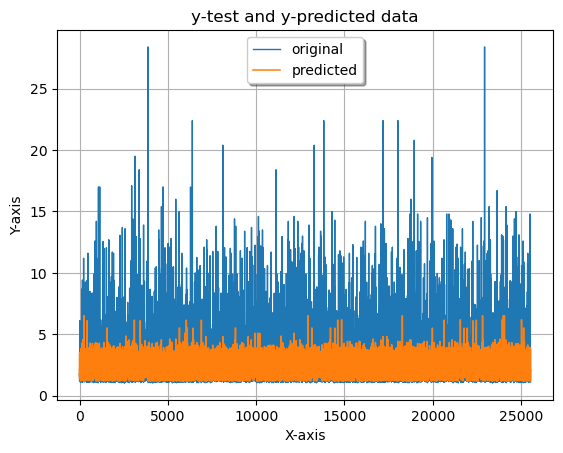

In [34]:
#Embedded methods - regression tree
X = numData[['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']]
y = numData[['avgOdds']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
RSqscore = model.score(X_train, y_train)
MSE = mean_squared_error(y_test,ypred)
RMSE = MSE**(1/2)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
print(RSqscore,MSE,RMSE)

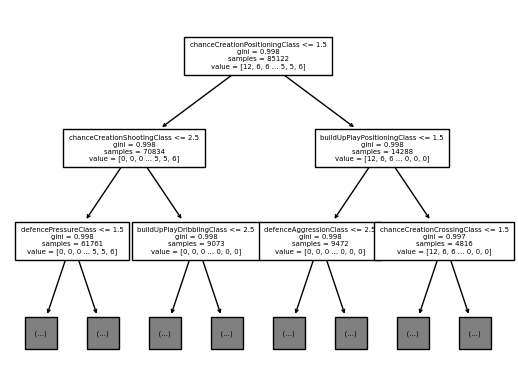

<Figure size 5000x5000 with 0 Axes>

In [43]:
#Cat Data


#Embedded methods - decision tree
#Conversion of string data to numeric done in excel
import pandas
df = pandas.read_csv("catDataConverted.csv")
inputs = ['buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass', 'chanceCreationPassingClass', 'chanceCreationCrossingClass', 'chanceCreationShootingClass','chanceCreationPositioningClass', 'defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']

X = df[inputs]
y = df['avgOdds']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y_transformed)

tree.plot_tree(clf, feature_names=inputs,max_depth=2,fontsize=5)
plt.figure(figsize=(50,50))
plt.savefig('tree',dpi=100)



In [38]:
#Filter Based Selection
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)


mi = mutual_info_classif(X_train, y_train)

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False)

buildUpPlayPositioningClass       0.283757
chanceCreationPositioningClass    0.260671
defenceDefenderLineClass          0.221074
chanceCreationShootingClass       0.203362
defenceTeamWidthClass             0.203119
buildUpPlayPassingClass           0.201651
defenceAggressionClass            0.195634
buildUpPlaySpeedClass             0.186725
chanceCreationPassingClass        0.185719
chanceCreationCrossingClass       0.183675
defencePressureClass              0.183634
buildUpPlayDribblingClass         0.080048
dtype: float64